**Objective:**

*   In this project sentiment of the IMDB corpus is analysed for a given sentense
*   We are going to predict two types of sentiments i.e. positive and negative using various machine learning classification 



**About dataset:**


1.   Dataset is collected from kaggle opensource repository [link ](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
2. It contains 50k movie reviews each review is classified into positive or negative
3. size of the dataset is 27MB



## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # Natural Language Toolkit


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cluster import KMeans

import os
import warnings
warnings.filterwarnings('ignore')


/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-12-06 01:05:30.163289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 01:05:30.316480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 01:05:30.316515: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
202

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Gathering data

In [4]:
imdb_data = pd.read_csv('IMDB Dataset.csv')

In [5]:
#displaying sample data
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#overview of dataset
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB





*   There are no null values in the dataset 
*   There are two columns in the dataset review and sentiment



In [7]:
#statistical view of the dataset
stat_data = imdb_data.describe()
stat_data

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
imdb_data[imdb_data.sentiment=='positive']

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [9]:
unique_reviews = stat_data['review']['unique']
actual_reviews = stat_data['review']['count']
duplicate_reviews_count = actual_reviews - unique_reviews
print('duplicate reviews in the dataset:',duplicate_reviews_count)

duplicate reviews in the dataset: 418


There are 418 duplicates in the review column

In [10]:
#identify duplicate rows in 'team' column
duplicateReviews = imdb_data[imdb_data.duplicated(['review'])]
duplicateReviews

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


## Data cleaning

1.  Removing duplicates
2.  Text normalization
> Tokenization. 















--------- Removing duplicates ----------


In [11]:


#dropping the duplicate reviews in the dataset
imdb_data.drop_duplicates(inplace = True)

# displaying rows and columns in the dataset after removing the duplicates
print(f'dataset contains {imdb_data.shape[0]} rows and {imdb_data.shape[1]} columns')

dataset contains 49582 rows and 2 columns


--------- Text normalization ----------  
1. "Text normalization is a process of converting the text to its standard form  or canonical form" 
2. Tokenization divides the string into its substring it is useful to find the  
words and punctuation marks in the given string

In [12]:

tokenizer=ToktokTokenizer()

#2.removing stopwords
stopword_list=nltk.corpus.stopwords.words('english') #Setting English stopwords

Stop words the list words in english which carry little or no information in the sentence

In [13]:
#sample stopwords
stopword_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

-----------denoising the data ----------------

In [14]:
def remove_html(text):

  # """this function removes the html tags from the sentence using BeautifulSoup python librabry
  # Input : text with html tags
  # Output : text after removing the html tags 
  # """

    soup = BeautifulSoup(text,'html.parser')
    return soup.get_text()


def remove_square_brackets(text):

  # """" This function removes the square brackets from the text
  # using regular expression python library
  # Input: text 
  # Output: text without square brackets """

     return re.sub('\[[^]]*\]', '', text)



def denoise_text(text):
  # """This function uses both functions remove_html and remove_square_bracket
  # and returns the clean text"""
      text = remove_html(text)
      text = remove_square_brackets(text)
      return text


In [15]:
#  Applying denoising functions to review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

-------------- Removing special characters --------------

In [16]:
def remove_special_characters(text,remove_digits = True):

  # """ This function removes the special characters from the text  """
  pattern = r'[^a-zA-z0-9\s]'
  re.sub(pattern,'',text)
  return text

# Applying remove_special_characters function to reviews column
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

## Text stemming:
The goal of both stemming and lemmatization is to reduce inflectional forms and   
sometimes derivationally related forms of a word to a common base form

The most common algorithm for stemming English, and one that has repeatedly been shown to be empirically very effective, is Porter's algorithm   

Porter's algorithm consists of 5 phases of word reductions, applied sequentially. Within each phase there are various conventions to select rules, such as selecting the rule from each rule group that applies to the longest suffix

In [17]:

def word_stemmer(text):
  # """ A word stemmer based on the Porter stemming algorithm """
    ps = nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


#Apply stemming function to the review column
imdb_data['review']=imdb_data['review'].apply(word_stemmer) 

In [18]:

def remove_stopwords(text, is_lower_case=False):
  # """ This function removes the stopwords in the text"""
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

## Train and test split of reviews(80-20)

In [19]:
# train data
review_train = imdb_data.review[:40000]
sentiment_train = imdb_data.sentiment[:40000]

print('train data',review_train.shape)

train data (40000,)


In [20]:
#sample data
# review_train.head()

In [21]:
#converting train reviews dataframe to string
review_train = review_train.to_string()

In [22]:
# review_train = TextBlob(review_train)
# review_train.correct()


In [23]:
# norm_review_train = review_train.words

In [24]:
# test data
# review_test = imdb_data.review[40000:]
# sentiment_test = imdb_data.sentiment[40000:]

#print('test data samples',review_test.shape)

In [25]:
#converting test samples to string
# review_test = review_test.to_string()


In [26]:
# review_test = TextBlob(review_test)
# review_test.correct()

In [27]:
# norm_review_test = review_test.words

## BoW(Bag of Words) modelling



*   Generally text data is messy but the machine learning models expect well defined fixed length data
*  BoW is a feature extraction technique like machine learning models
*  BoW forms the vocabulary of the text and counts the frequency of the words
*  Bag means the models ignores the order it only consider the presence of the word

In simple words converting text to numeric vectors retaining the linguistic information




In [28]:
review_train = imdb_data.review[0:40000]
review_test = imdb_data.review[40000:]

In [29]:
#initializing the countvectorizer
vectorizer = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# transforming the train reviews with count vectorizer
vect_train_reviews = vectorizer.fit_transform(review_train)

# transforming the train reviews with count vectorizer
vect_test_reviews = vectorizer.transform(review_test)

In [31]:
vocab = vectorizer.get_feature_names() # to get features

In [32]:
print('Bag of words train shape:',vect_train_reviews.shape)
print('Bag of words test shape:',vect_test_reviews.shape)

Bag of words train shape: (40000, 6442804)
Bag of words test shape: (9582, 6442804)


Disadvanatages of BoW:


*  With the introduction of new word the size of the matrix increases
*  Resulting in more sparsity



## Term Frequency-Inverse Document Frequency (TF-IDF)





*  Converts a collection of raw text to a matrix of TF-IDF features.
*   Tf-IDF is equivalent to CountVectorizer with the aditional feature inverse transform




 [Resource](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,vectors%20are%20easy%20to%20interpret.)

In [33]:
#Tfidf vectorizer
term_idf = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
term_idf_train = term_idf.fit_transform(review_train)
#transformed test reviews
term_idf_test = term_idf.transform(review_test)
print('Tfidf_train:',term_idf_train.shape)
print('Tfidf_test:',term_idf_test.shape)

Tfidf_train: (40000, 6442804)
Tfidf_test: (9582, 6442804)


## Applying label encoding to sentiments

In [34]:
# creating label binarizer object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# transform the sentiment data
sentiments = le.fit_transform(imdb_data['sentiment'])

In [35]:
#inverse transform of label binarizer
le.inverse_transform([0,1])

array(['negative', 'positive'], dtype=object)

## Train and test split - sentiments(80-20)

In [36]:
# train sentiments
train_sentiments=sentiments[0:40000]
#test sentiments
test_sentiments=sentiments[40000:]

print('train sentiments shape:',train_sentiments.shape)
print('test sentimetns shape:',test_sentiments.shape)

train sentiments shape: (40000,)
test sentimetns shape: (9582,)


## Word Cloud

In [40]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 51.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


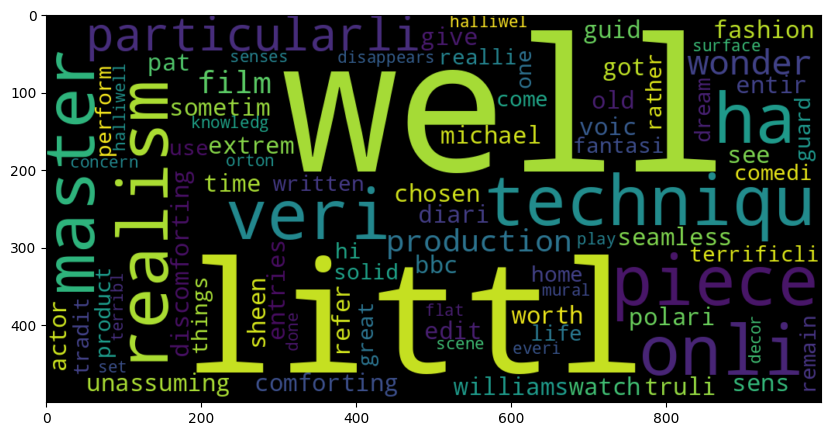

In [41]:
#word cloud for positive review words
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
positive_text=review_train[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

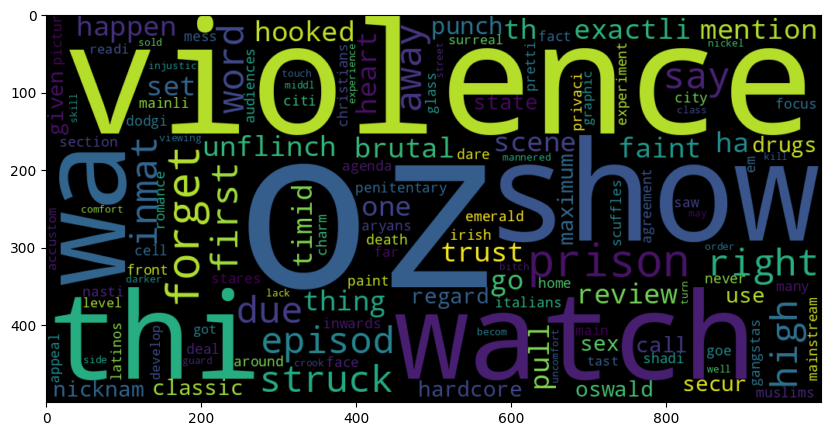

In [42]:
#word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=review_train[0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

## Machine learning models

1. Multinomial NaiveBayes classifier

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article

In [43]:
#training the model
multi_nb = MultinomialNB()
#fitting the multinomial naive bayes for bag of words
multi_nb_bow = multi_nb.fit(vect_train_reviews,train_sentiments)
print(multi_nb_bow)


MultinomialNB()


In [44]:
# BoW model predictions
nb_bow_pred = multi_nb_bow.predict(vect_test_reviews)


In [45]:

#fitting the multinomial naive bayesfor tfidf features
multi_nb_tfidf=multi_nb.fit(term_idf_train,train_sentiments)
print(multi_nb_tfidf)


MultinomialNB()


1.1 Model predictions 

In [46]:

# tfidf model predictions
nb_tfidf_pred = multi_nb_tfidf.predict(term_idf_test)

1.2 Scaling Multinomial Naive Bayes

In [47]:
#1 classification report
cls_report1 = classification_report(test_sentiments, nb_bow_pred, labels=[0,1])

print('classification report of BoW model:\n',cls_report1)

classification report of BoW model:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      4756
           1       0.76      0.74      0.75      4826

    accuracy                           0.75      9582
   macro avg       0.75      0.75      0.75      9582
weighted avg       0.75      0.75      0.75      9582



In [48]:
#2 classification report
cls_report2 = classification_report(test_sentiments, nb_tfidf_pred, labels=[0,1])

print('classification report of tfidf model:\n',cls_report2)

classification report of tfidf model:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      4756
           1       0.74      0.77      0.76      4826

    accuracy                           0.75      9582
   macro avg       0.75      0.75      0.75      9582
weighted avg       0.75      0.75      0.75      9582



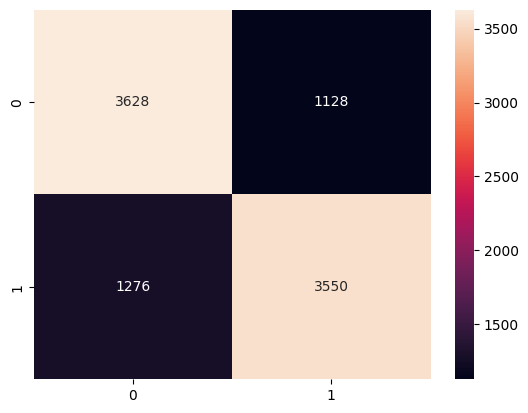

In [49]:
#confusion matrix
cm1 = confusion_matrix(test_sentiments, nb_bow_pred, labels=[0,1])
sns.heatmap(cm1,annot= True,fmt='g')
plt.show()

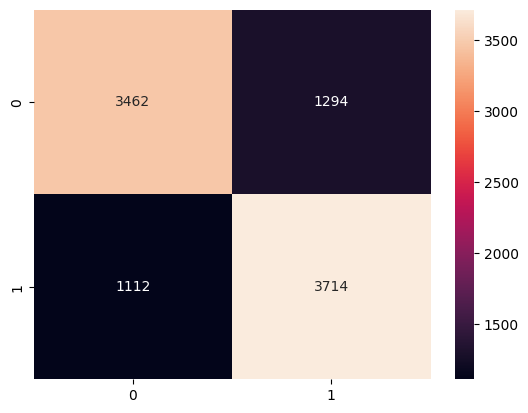

In [50]:
cm2 = confusion_matrix(test_sentiments, nb_tfidf_pred, labels=[0,1])
sns.heatmap(cm2,annot= True,fmt='g')
plt.show()

2.Stochastic Gradient Descent(SGD)

SGD is an efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.   
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.



In [51]:
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_bow = sgd_classifier.fit(vect_train_reviews,train_sentiments)
print(sgd_bow)
#fitting the svm for tfidf features
sgd_tfidf = sgd_classifier.fit(term_idf_train,train_sentiments)
print(sgd_tfidf)

SGDClassifier(max_iter=5)
SGDClassifier(max_iter=5)


2.1 Model predicitions

In [52]:
#BoW model predictions
sgd_bow_pred = sgd_bow.predict(vect_test_reviews)


In [53]:

#tfidf model predictions
sgd_tfidf_pred = sgd_tfidf.predict(term_idf_test)

2.1 Scaling Stochastic Gradient Descent 

In [54]:
#classification report of BoW model
cls_report1 = classification_report(test_sentiments, sgd_bow_pred, labels=[0,1])
print('classification report of BoW model:\n',cls_report1)

classification report of BoW model:
               precision    recall  f1-score   support

           0       0.95      0.00      0.01      4756
           1       0.50      1.00      0.67      4826

    accuracy                           0.51      9582
   macro avg       0.73      0.50      0.34      9582
weighted avg       0.73      0.51      0.34      9582



In [55]:
#classification report of tfidf model
cls_report2 = classification_report(test_sentiments, sgd_tfidf_pred, labels=[0,1])
print('classification report of tfidf model:\n',cls_report2)

classification report of tfidf model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4756
           1       0.50      1.00      0.67      4826

    accuracy                           0.50      9582
   macro avg       0.25      0.50      0.33      9582
weighted avg       0.25      0.50      0.34      9582



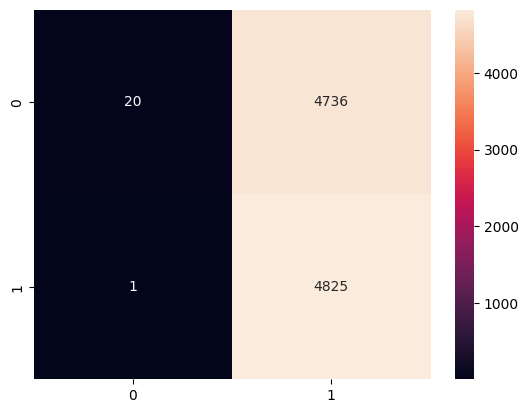

In [56]:
#confusion matrix
#confusion matrix
cm1 = confusion_matrix(test_sentiments, sgd_bow_pred, labels=[0,1])
sns.heatmap(cm1,annot= True,fmt='g')
plt.show()

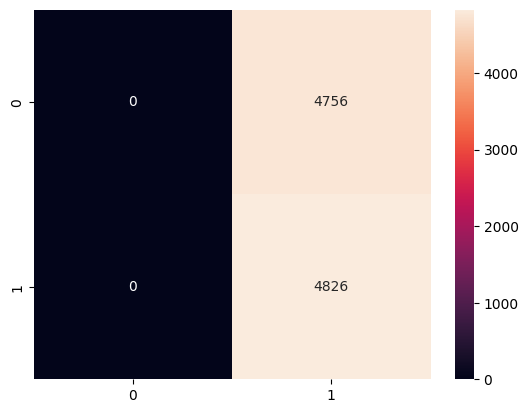

In [57]:
#confusion matrix
cm2 = confusion_matrix(test_sentiments, sgd_tfidf_pred, labels=[0,1])
sns.heatmap(cm2,annot= True,fmt='g')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c8b7d01-f5e8-4221-986c-39df67281f65' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>